# 1. pre-procesamiento

## 1.1 Limpieza del texto

In [1]:
## "abro" el corpus y le indico el código y lo que haré primero, que es leer 'r', y que lo necesito dividir
## en líneas con ('\n')
corpus = open("rawcordial.txt", "r", encoding="utf-8")
rawcordial=corpus.read()
cordial0=rawcordial.split('\n')

In [2]:
## pruebo
cordial0[:5]

['con este trabajo  los dos más recientes  bueno ADMYTE que lo conocéis  seguramente con Marcos Marín  que ya os lo ha contado  y el último proyecto que hemos hecho  que acabamos de terminar el año pasado y que está ahora mismo en proceso de  de distribución es el proyecto C-ORAL-ROM del que os hablaré  detenidamente  esto lo digo normalmente  no lo digo para que os agobiéis ni nada  sino para que sepáis  que tenemos suficiente experiencia para  para contar muchas cosas  y  llevamos trabajando mucho tiempo  en  en todo tipo de  de  aplicaciones del procesamiento de lenguaje natural entonces   yo otros años  lo que he hecho  ha sido  pues seguir un sistema como os comenté bastante más  académico  que consistía en contar los fundamentos ... y este año realmente quiero dar un  un cambio un poco más  siempre hemos hecho muchas cosas aplicadas  porque siempre hemos hecho  por lo menos dos prácticas  que consiste en hacer una gramática computacional  y hacer también alguna otra cosa  pero es

In [3]:
## mi texto tiene muchos espacios en blanco que no me sirven, así que uso RE para quitarlos
import re

## creo una lista donde quedará mi texto sin espacio en blanco. 
cordial1 =[]
## uso un for que recorre el texto buscando espacios en blanco repetidos. 
for oracion in cordial0:
    espacios_dobles = re.compile(r'\s\s')
    cordial1 += [espacios_dobles.sub(" ", oracion)]
##pruebo
print(cordial1[:5])

['con este trabajo los dos más recientes bueno ADMYTE que lo conocéis seguramente con Marcos Marín que ya os lo ha contado y el último proyecto que hemos hecho que acabamos de terminar el año pasado y que está ahora mismo en proceso de de distribución es el proyecto C-ORAL-ROM del que os hablaré detenidamente esto lo digo normalmente no lo digo para que os agobiéis ni nada sino para que sepáis que tenemos suficiente experiencia para para contar muchas cosas y llevamos trabajando mucho tiempo en en todo tipo de de aplicaciones del procesamiento de lenguaje natural entonces  yo otros años lo que he hecho ha sido pues seguir un sistema como os comenté bastante más académico que consistía en contar los fundamentos ... y este año realmente quiero dar un un cambio un poco más siempre hemos hecho muchas cosas aplicadas porque siempre hemos hecho por lo menos dos prácticas que consiste en hacer una gramática computacional y hacer también alguna otra cosa pero este año directamente creo que vam

In [4]:
## uso un ciclo for para recorrer el texto y separarlo en cada punto.
oracionescordial = []
for oracion in cordial1:
    oracionescordial += oracion.split('.')

In [5]:
## pruebo a ver si funcionó
oracionescordial[:5]

['con este trabajo los dos más recientes bueno ADMYTE que lo conocéis seguramente con Marcos Marín que ya os lo ha contado y el último proyecto que hemos hecho que acabamos de terminar el año pasado y que está ahora mismo en proceso de de distribución es el proyecto C-ORAL-ROM del que os hablaré detenidamente esto lo digo normalmente no lo digo para que os agobiéis ni nada sino para que sepáis que tenemos suficiente experiencia para para contar muchas cosas y llevamos trabajando mucho tiempo en en todo tipo de de aplicaciones del procesamiento de lenguaje natural entonces  yo otros años lo que he hecho ha sido pues seguir un sistema como os comenté bastante más académico que consistía en contar los fundamentos ',
 '',
 '',
 ' y este año realmente quiero dar un un cambio un poco más siempre hemos hecho muchas cosas aplicadas porque siempre hemos hecho por lo menos dos prácticas que consiste en hacer una gramática computacional y hacer también alguna otra cosa pero este año directamente 

In [6]:
oracionescordial=[string.strip() for string in oracionescordial]

In [7]:
oracionescordial=[string for string in oracionescordial if len(string) >0]

In [8]:
## convierto la mayúsuclas en minúsculas 
oracionescordial=[string.lower() for string in oracionescordial]

In [9]:
## número de oraciones

len(oracionescordial)

8619

In [10]:
oracionescordial[:5]

['con este trabajo los dos más recientes bueno admyte que lo conocéis seguramente con marcos marín que ya os lo ha contado y el último proyecto que hemos hecho que acabamos de terminar el año pasado y que está ahora mismo en proceso de de distribución es el proyecto c-oral-rom del que os hablaré detenidamente esto lo digo normalmente no lo digo para que os agobiéis ni nada sino para que sepáis que tenemos suficiente experiencia para para contar muchas cosas y llevamos trabajando mucho tiempo en en todo tipo de de aplicaciones del procesamiento de lenguaje natural entonces  yo otros años lo que he hecho ha sido pues seguir un sistema como os comenté bastante más académico que consistía en contar los fundamentos',
 'y este año realmente quiero dar un un cambio un poco más siempre hemos hecho muchas cosas aplicadas porque siempre hemos hecho por lo menos dos prácticas que consiste en hacer una gramática computacional y hacer también alguna otra cosa pero este año directamente creo que vam

In [11]:
## remuevo la puntuación
import string

def remover_puntuacion(s): 
    for c in string.punctuation:
        s=s.replace(c,"")
    return s

In [12]:
## creo una lista donde se guarde mi texto sin puntuación
cordialimpio =[]
for oracion in oracionescordial:
    cordialimpio += [remover_puntuacion(oracion)]

In [13]:
cordialimpio[:5]

['con este trabajo los dos más recientes bueno admyte que lo conocéis seguramente con marcos marín que ya os lo ha contado y el último proyecto que hemos hecho que acabamos de terminar el año pasado y que está ahora mismo en proceso de de distribución es el proyecto coralrom del que os hablaré detenidamente esto lo digo normalmente no lo digo para que os agobiéis ni nada sino para que sepáis que tenemos suficiente experiencia para para contar muchas cosas y llevamos trabajando mucho tiempo en en todo tipo de de aplicaciones del procesamiento de lenguaje natural entonces  yo otros años lo que he hecho ha sido pues seguir un sistema como os comenté bastante más académico que consistía en contar los fundamentos',
 'y este año realmente quiero dar un un cambio un poco más siempre hemos hecho muchas cosas aplicadas porque siempre hemos hecho por lo menos dos prácticas que consiste en hacer una gramática computacional y hacer también alguna otra cosa pero este año directamente creo que vamos

In [14]:
## finalmente, contaré la cantidad de palabras y palabras únicas en el texto
palabrascordial = []

for oracion in cordial0:
    palabrascordial+=[oracion.split(' ')]

In [15]:
listapalabras = []

for oracion in palabrascordial:
    palabras2= []
    for word in oracion:
        if len(word) >0:
            palabras2+=[word]
            
    listapalabras+=[palabras2]
        

In [16]:
listapalabras[:2]

[['con',
  'este',
  'trabajo',
  'los',
  'dos',
  'más',
  'recientes',
  'bueno',
  'ADMYTE',
  'que',
  'lo',
  'conocéis',
  'seguramente',
  'con',
  'Marcos',
  'Marín',
  'que',
  'ya',
  'os',
  'lo',
  'ha',
  'contado',
  'y',
  'el',
  'último',
  'proyecto',
  'que',
  'hemos',
  'hecho',
  'que',
  'acabamos',
  'de',
  'terminar',
  'el',
  'año',
  'pasado',
  'y',
  'que',
  'está',
  'ahora',
  'mismo',
  'en',
  'proceso',
  'de',
  'de',
  'distribución',
  'es',
  'el',
  'proyecto',
  'C-ORAL-ROM',
  'del',
  'que',
  'os',
  'hablaré',
  'detenidamente',
  'esto',
  'lo',
  'digo',
  'normalmente',
  'no',
  'lo',
  'digo',
  'para',
  'que',
  'os',
  'agobiéis',
  'ni',
  'nada',
  'sino',
  'para',
  'que',
  'sepáis',
  'que',
  'tenemos',
  'suficiente',
  'experiencia',
  'para',
  'para',
  'contar',
  'muchas',
  'cosas',
  'y',
  'llevamos',
  'trabajando',
  'mucho',
  'tiempo',
  'en',
  'en',
  'todo',
  'tipo',
  'de',
  'de',
  'aplicaciones',
  'de

In [17]:
palabrasfinal = []

for oracion in listapalabras:
    for palabra in oracion:
        palabrasfinal += [palabra]

In [18]:
palabrasfinal[:10]

['con',
 'este',
 'trabajo',
 'los',
 'dos',
 'más',
 'recientes',
 'bueno',
 'ADMYTE',
 'que']

In [19]:
len(palabrasfinal), len(set(palabrasfinal))

(118592, 10220)

## 1.2 búsqueda y etiquetado 

### rastreo de adverbios terminados en -mente

In [20]:
## primero, antes de usar spacy, buscaré y contaré las palabras terminadas en -mente, para esto uso re
import re

In [21]:
## le señalo cual es el patrón que busco
patron= r'\w+mente'

In [22]:
## creo una lista con los elementos que coinciden
match = re.findall(r"\w+mente\b", rawcordial)

In [23]:
match[:15]

['seguramente',
 'detenidamente',
 'normalmente',
 'realmente',
 'directamente',
 'solamente',
 'solamente',
 'directamente',
 'realmente',
 'probablemente',
 'exactamente',
 'simplemente',
 'simplemente',
 'evidentemente',
 'exactamente']

In [24]:
#números de adverbios terminados en -mente
len(match)

560

In [25]:
## crearé un diccionario que contenga los adverbios de mi corpus y su cantidad de ocurrencias, para ello creo una 
## lista de palabras únicas, y recorro el texto buscándolas
palabras_unicas = []
for palabra in match:
    if palabra not in palabras_unicas:
        palabras_unicas += [palabra]

In [26]:
D = {palabra:0 for palabra in palabras_unicas}

In [27]:
for palabra in match:
  
  D[palabra] += 1

In [28]:
D['naturalmente']

3

In [29]:
#adverbios terminados en -mente
print(len(D))

134


In [40]:
L=['ciertamente', 'evidentemente', 'incuestionablemente', 'indiscutiblemente', 'indudablemente', 'obviamente', 'realmente', 'verdaderamente','aparentemente', 'hipotéticamente', 'nominalmente', 'presumiblemente', 'presuntamente', 'pretendidamente','supuestamente', 'teóricamente', 'virtualmente', 'francamente', 'honestamente', 'honradamente', 'sinceramente']

In [41]:
Dreforzadores={}
L1=['ciertamente', 'evidentemente', 'incuestionablemente', 'indiscutiblemente', 'indudablemente', 'obviamente', 'realmente', 'verdaderamente']
## está bacán esto
for adverbio in L1:
    Dreforzadores[adverbio]=rawcordial.count(adverbio)

In [42]:
Drestrictores={}
L2=['aparentemente', 'hipotéticamente', 'nominalmente', 'presumiblemente', 'presuntamente', 'pretendidamente','supuestamente', 'teóricamente', 'virtualmente']
for adverbio in L2:
    Drestrictores[adverbio]=rawcordial.count(adverbio)

In [43]:
Dhablante={}
L3=['francamente', 'honestamente', 'honradamente', 'sinceramente']
## está bacán esto
for adverbio in L3:
    Dhablante[adverbio]=rawcordial.count(adverbio)

In [44]:
Dreforzadores

{'ciertamente': 0,
 'evidentemente': 17,
 'incuestionablemente': 0,
 'indiscutiblemente': 0,
 'indudablemente': 2,
 'obviamente': 3,
 'realmente': 41,
 'verdaderamente': 14}

In [45]:
Drestrictores

{'aparentemente': 2,
 'hipotéticamente': 0,
 'nominalmente': 0,
 'presumiblemente': 0,
 'presuntamente': 0,
 'pretendidamente': 0,
 'supuestamente': 0,
 'teóricamente': 1,
 'virtualmente': 2}

In [46]:
Dhablante

{'francamente': 2, 'honestamente': 0, 'honradamente': 0, 'sinceramente': 10}

In [47]:
## Cantidad de adverbios evidenciales
sum(Dreforzadores.values())


77

In [48]:
sum(Drestrictores.values())


5

In [49]:
sum(Dhablante.values())

12

### Oraciones con adverbios evidenciales

In [50]:
D_oraciones_mente = {adv:[] for adv in L}

In [51]:
for oracion in cordialimpio:
    for adv in L:
        O = oracion.split(' ')
        if adv in O:
            D_oraciones_mente[adv]+=[O]

In [56]:
D_oraciones_mente['teóricamente']

[['de', 'teóricamente', 'formados', 'yo', 'que', 'sé', 'dónde']]

In [53]:
oraciones_adv = []

for adv in D_oraciones_mente.keys():
    oraciones_adv+=D_oraciones_mente[adv]

In [54]:
len(oraciones_adv)

91

### co-occurrencias de adverbios evidenciales terminados en -mente

In [66]:
## Red de co-ocurrencias entre palabras :)
import networkx as nx

def GoW(listapalabras,L_words):
    
    G=nx.Graph()
    for sentence in listapalabras:
        if len(sentence)>1:
            for word in L_words:
                word_index = []
                for i in range(len(sentence)):
                    if word == sentence[i]:
                        word_index+=[i]
                pairs = []
                for index in word_index:
                    if index-1 in range(len(sentence)):
                        if sentence[index-1]!='':
                            pairs+=[[index,index-1]]
                    if index+1 in range(len(sentence)):
                        if sentence[index+1]!='':
                            pairs+=[[index,index+1]]
            
                for pair in pairs:
                    if G.has_edge(sentence[pair[0]],sentence[pair[1]])==False:
                        G.add_edge(sentence[pair[0]],sentence[pair[1]],weight=1)
                    else:
                        x=G[sentence[pair[0]]][sentence[pair[1]]]['weight']
                        G[sentence[pair[0]]][sentence[pair[1]]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    
    return G0.subgraph([node for node in G0.nodes() if node in L or sum([G.has_edge(node, l) for l in L])])

In [67]:
G=GoW(listapalabras,L)

In [68]:
import matplotlib.pyplot as plt

def plotG_centrality(G):
    
    #G0 = G.copy()
    #G0.remove_edges_from(nx.selfloop_edges(G0))
    #G = nx.k_core(G0)
    G = nx.maximum_spanning_tree(G)
    fig, ax = plt.subplots(dpi=800)
    centrality = nx.pagerank(G,weight='weight')
    ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
    labels = {i:i for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:50]))[0] or i in L}
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 50, node_color='orange',node_shape='o',alpha=0.95, linewidths=0.1) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='k')
    nx.draw_networkx_labels(G,pos,labels,alpha=1,font_size=3.,font_color='k',font_family='monospace')
    #plt.title('Red {}'.format(Y),fontsize=8)
    plt.savefig('global.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
    plt.axis('off')
    plt.show()

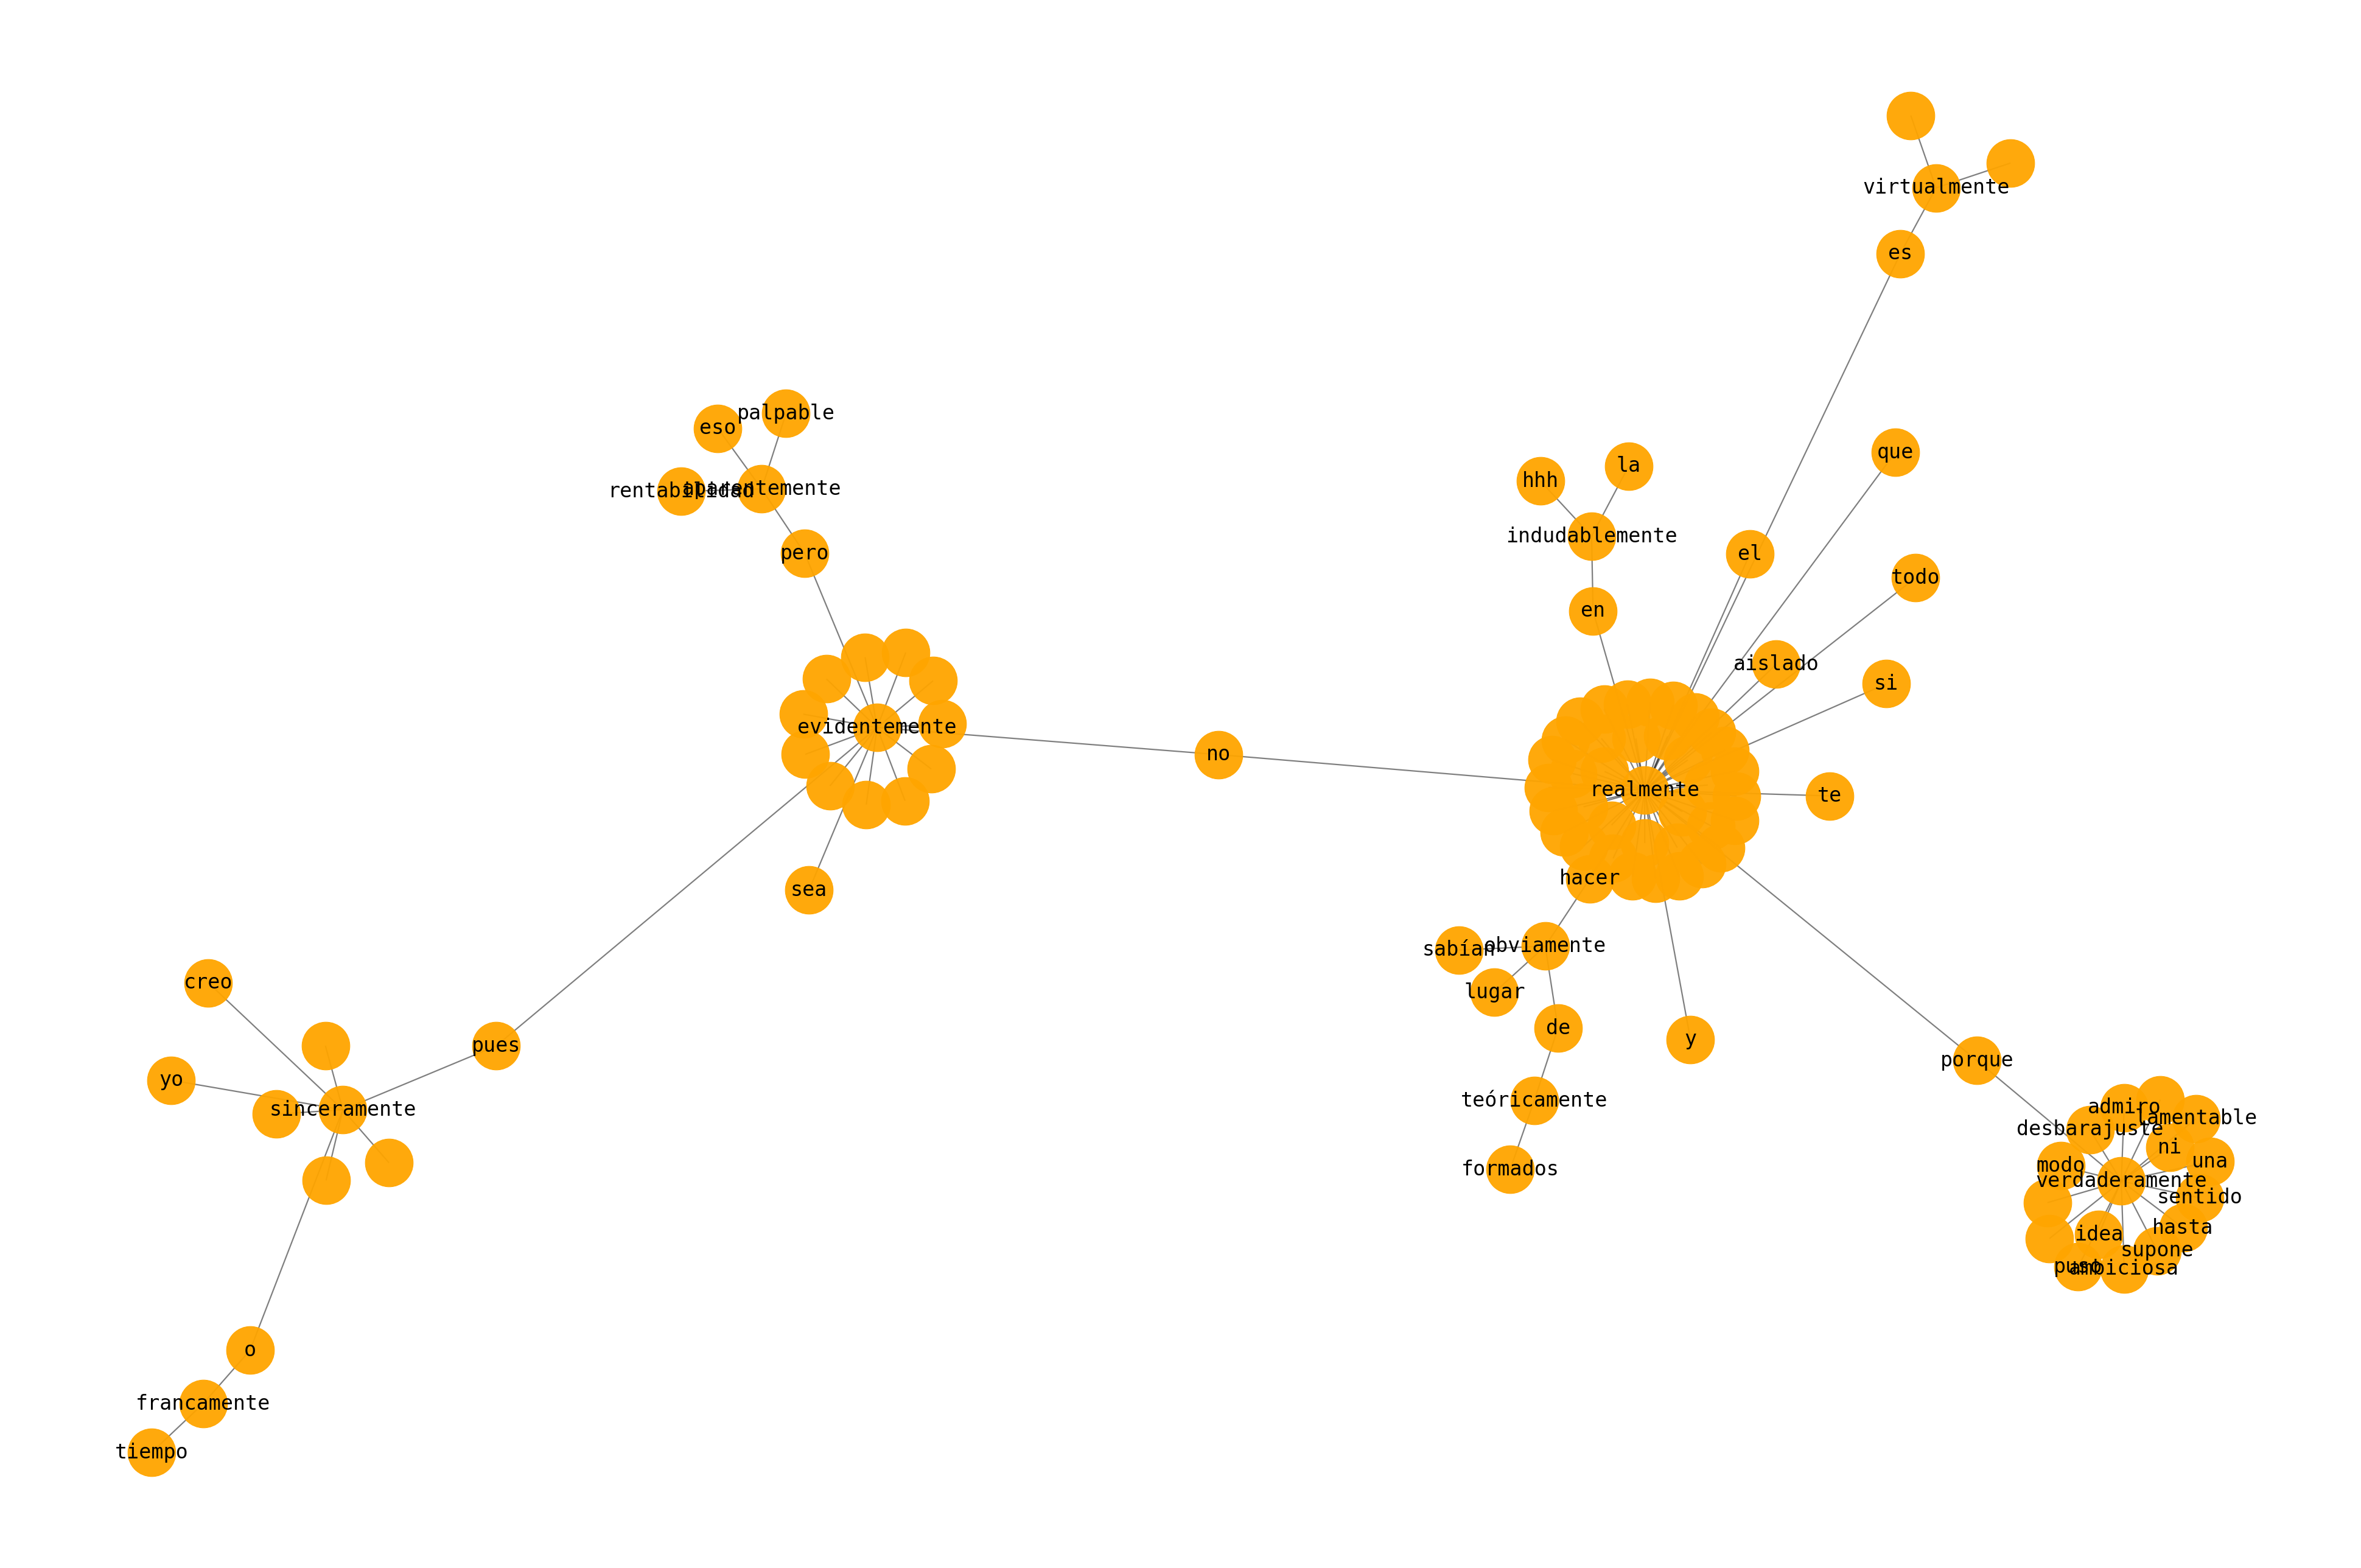

In [69]:
plotG_centrality(G)

In [70]:
def ranking(palabra,k):
    red = G
    return list({k: v for k, v in sorted(dict(red[palabra]).items(), key=lambda item: item[1]['weight'],reverse=True)}.keys())[:k]

In [71]:
for p in L:
    if p in G.nodes():
        print(p,ranking(p,5))

evidentemente ['pues', 'no', 'porque', 'pero', 'es']
indudablemente ['hhh', 'en', 'que', 'la']
obviamente ['idea', 'de', 'sabían', 'hacer', 'lugar']
realmente ['es', 'no', 'porque', 'que', 'todo']
verdaderamente ['yo', 'porque', 'que', 'supone', 'una']
aparentemente ['pero', 'eso', 'rentabilidad', 'palpable']
teóricamente ['de', 'formados']
virtualmente ['es', 'imposible', 'reuniendo', 'en']
francamente ['tiempo', 'y', 'o']
sinceramente ['o', 'creo', 'pues', 'yo', 'no']


In [91]:
L

['ciertamente',
 'evidentemente',
 'incuestionablemente',
 'indiscutiblemente',
 'indudablemente',
 'obviamente',
 'realmente',
 'verdaderamente',
 'aparentemente',
 'hipotéticamente',
 'nominalmente',
 'presumiblemente',
 'presuntamente',
 'pretendidamente',
 'supuestamente',
 'teóricamente',
 'virtualmente',
 'francamente',
 'honestamente',
 'honradamente',
 'sinceramente']

#### Reforzadores de verdad

In [92]:
## Red de co-ocurrencias entre palabras :)
import networkx as nx

def GoW(listapalabras,L1_words):
    
    G=nx.Graph()
    for sentence in listapalabras:
        if len(sentence)>1:
            for word in L1_words:
                word_index = []
                for i in range(len(sentence)):
                    if word == sentence[i]:
                        word_index+=[i]
                pairs = []
                for index in word_index:
                    if index-1 in range(len(sentence)):
                        if sentence[index-1]!='':
                            pairs+=[[index,index-1]]
                    if index+1 in range(len(sentence)):
                        if sentence[index+1]!='':
                            pairs+=[[index,index+1]]
            
                for pair in pairs:
                    if G.has_edge(sentence[pair[0]],sentence[pair[1]])==False:
                        G.add_edge(sentence[pair[0]],sentence[pair[1]],weight=1)
                    else:
                        x=G[sentence[pair[0]]][sentence[pair[1]]]['weight']
                        G[sentence[pair[0]]][sentence[pair[1]]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    
    return G0.subgraph([node for node in G0.nodes() if node in L1 or sum([G.has_edge(node, l) for l in L1])])

In [93]:
G=GoW(listapalabras,L1)

In [94]:
import matplotlib.pyplot as plt

def plotG_centrality(G):
    
    #G0 = G.copy()
    #G0.remove_edges_from(nx.selfloop_edges(G0))
    #G = nx.k_core(G0)
    G = nx.maximum_spanning_tree(G)
    fig, ax = plt.subplots(dpi=800)
    centrality = nx.pagerank(G,weight='weight')
    ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
    labels = {i:i for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:50]))[0] or i in L1}
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 50, node_color='orange',node_shape='o',alpha=0.95, linewidths=0.1) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='k')
    nx.draw_networkx_labels(G,pos,labels,alpha=1,font_size=3.,font_color='k',font_family='monospace')
    #plt.title('Red {}'.format(Y),fontsize=8)
    plt.savefig('reforzador.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
    plt.axis('off')
    plt.show()

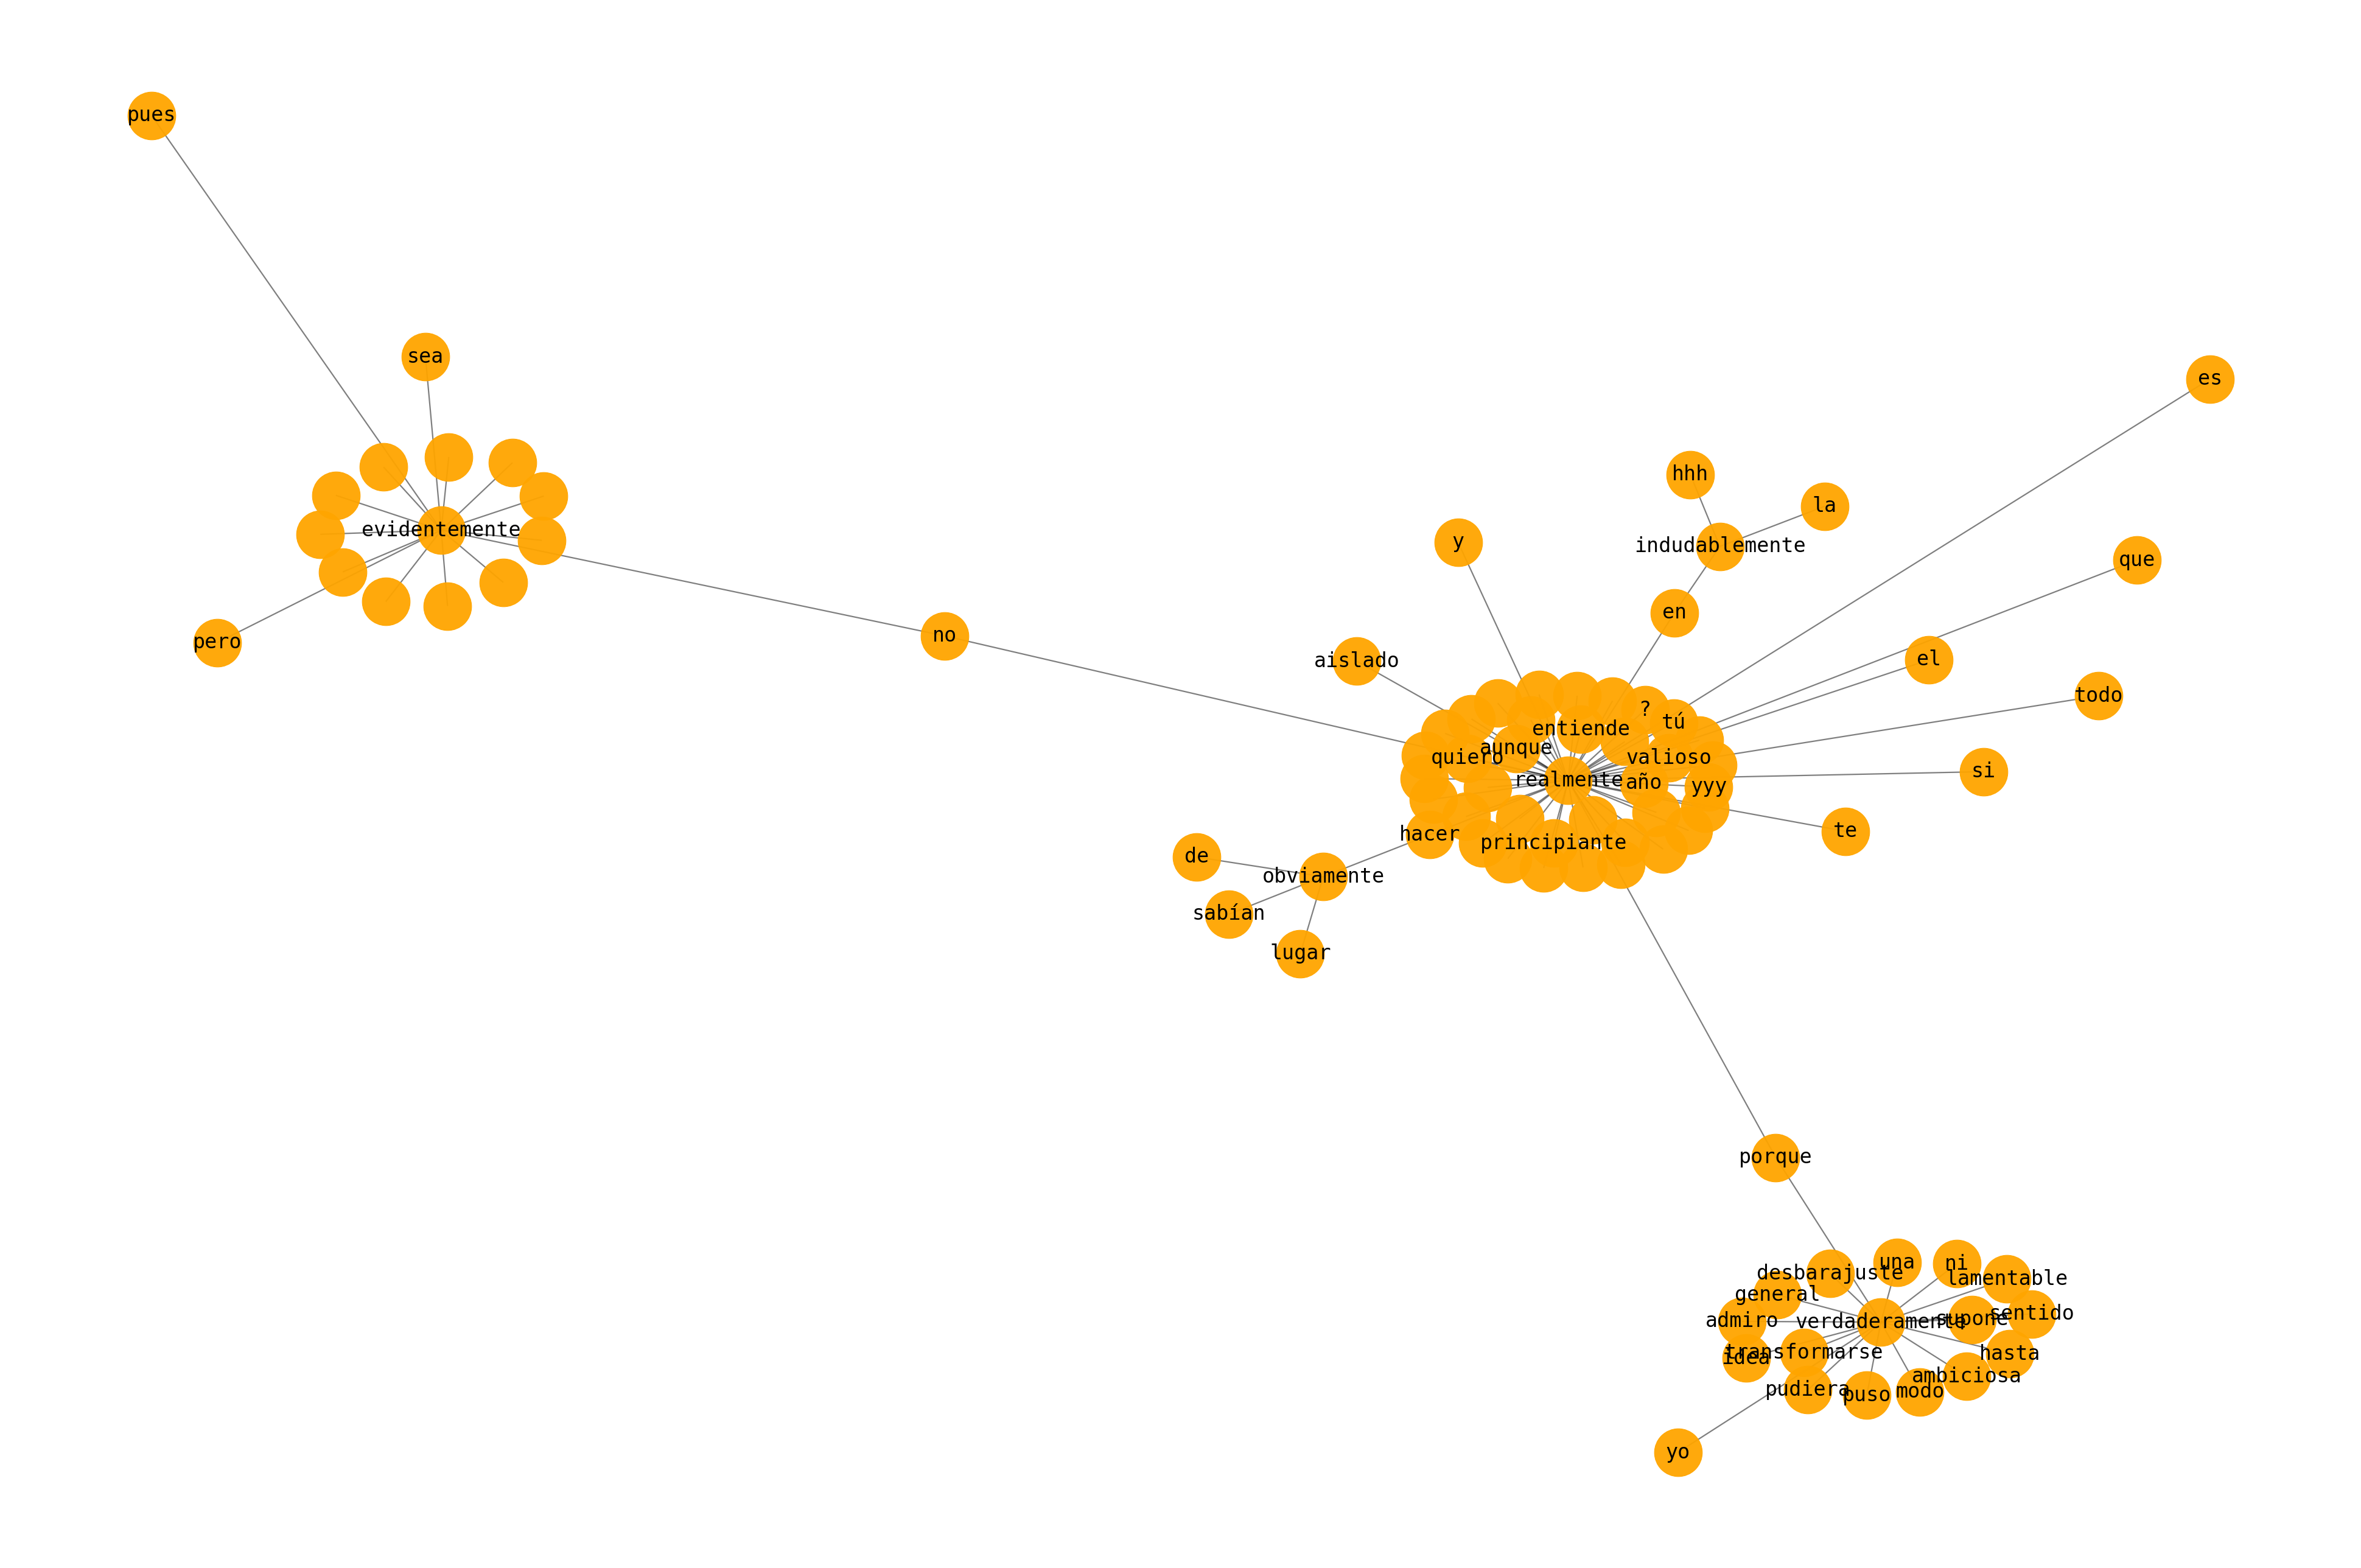

In [95]:
plotG_centrality(G)

In [96]:
for p in L1:
    if p in G.nodes():
        print(p,ranking(p,5))

evidentemente ['pues', 'no', 'porque', 'pero', 'es']
indudablemente ['hhh', 'en', 'que', 'la']
obviamente ['idea', 'de', 'sabían', 'hacer', 'lugar']
realmente ['es', 'no', 'porque', 'que', 'todo']
verdaderamente ['yo', 'porque', 'que', 'supone', 'una']


#### Restrictores de verdad

In [97]:
## Red de co-ocurrencias entre palabras :)
import networkx as nx

def GoW(listapalabras,L2_words):
    
    G=nx.Graph()
    for sentence in listapalabras:
        if len(sentence)>1:
            for word in L2_words:
                word_index = []
                for i in range(len(sentence)):
                    if word == sentence[i]:
                        word_index+=[i]
                pairs = []
                for index in word_index:
                    if index-1 in range(len(sentence)):
                        if sentence[index-1]!='':
                            pairs+=[[index,index-1]]
                    if index+1 in range(len(sentence)):
                        if sentence[index+1]!='':
                            pairs+=[[index,index+1]]
            
                for pair in pairs:
                    if G.has_edge(sentence[pair[0]],sentence[pair[1]])==False:
                        G.add_edge(sentence[pair[0]],sentence[pair[1]],weight=1)
                    else:
                        x=G[sentence[pair[0]]][sentence[pair[1]]]['weight']
                        G[sentence[pair[0]]][sentence[pair[1]]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    
    return G0.subgraph([node for node in G0.nodes() if node in L2 or sum([G.has_edge(node, l) for l in L2])])

In [98]:
G=GoW(listapalabras,L2)

In [99]:
import matplotlib.pyplot as plt

def plotG_centrality(G):
    
    #G0 = G.copy()
    #G0.remove_edges_from(nx.selfloop_edges(G0))
    #G = nx.k_core(G0)
    G = nx.maximum_spanning_tree(G)
    fig, ax = plt.subplots(dpi=800)
    centrality = nx.pagerank(G,weight='weight')
    ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
    labels = {i:i for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:50]))[0] or i in L2}
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 50, node_color='orange',node_shape='o',alpha=0.95, linewidths=0.1) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='k')
    nx.draw_networkx_labels(G,pos,labels,alpha=1,font_size=3.,font_color='k',font_family='monospace')
    #plt.title('Red {}'.format(Y),fontsize=8)
    plt.savefig('restrictor.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
    plt.axis('off')
    plt.show()

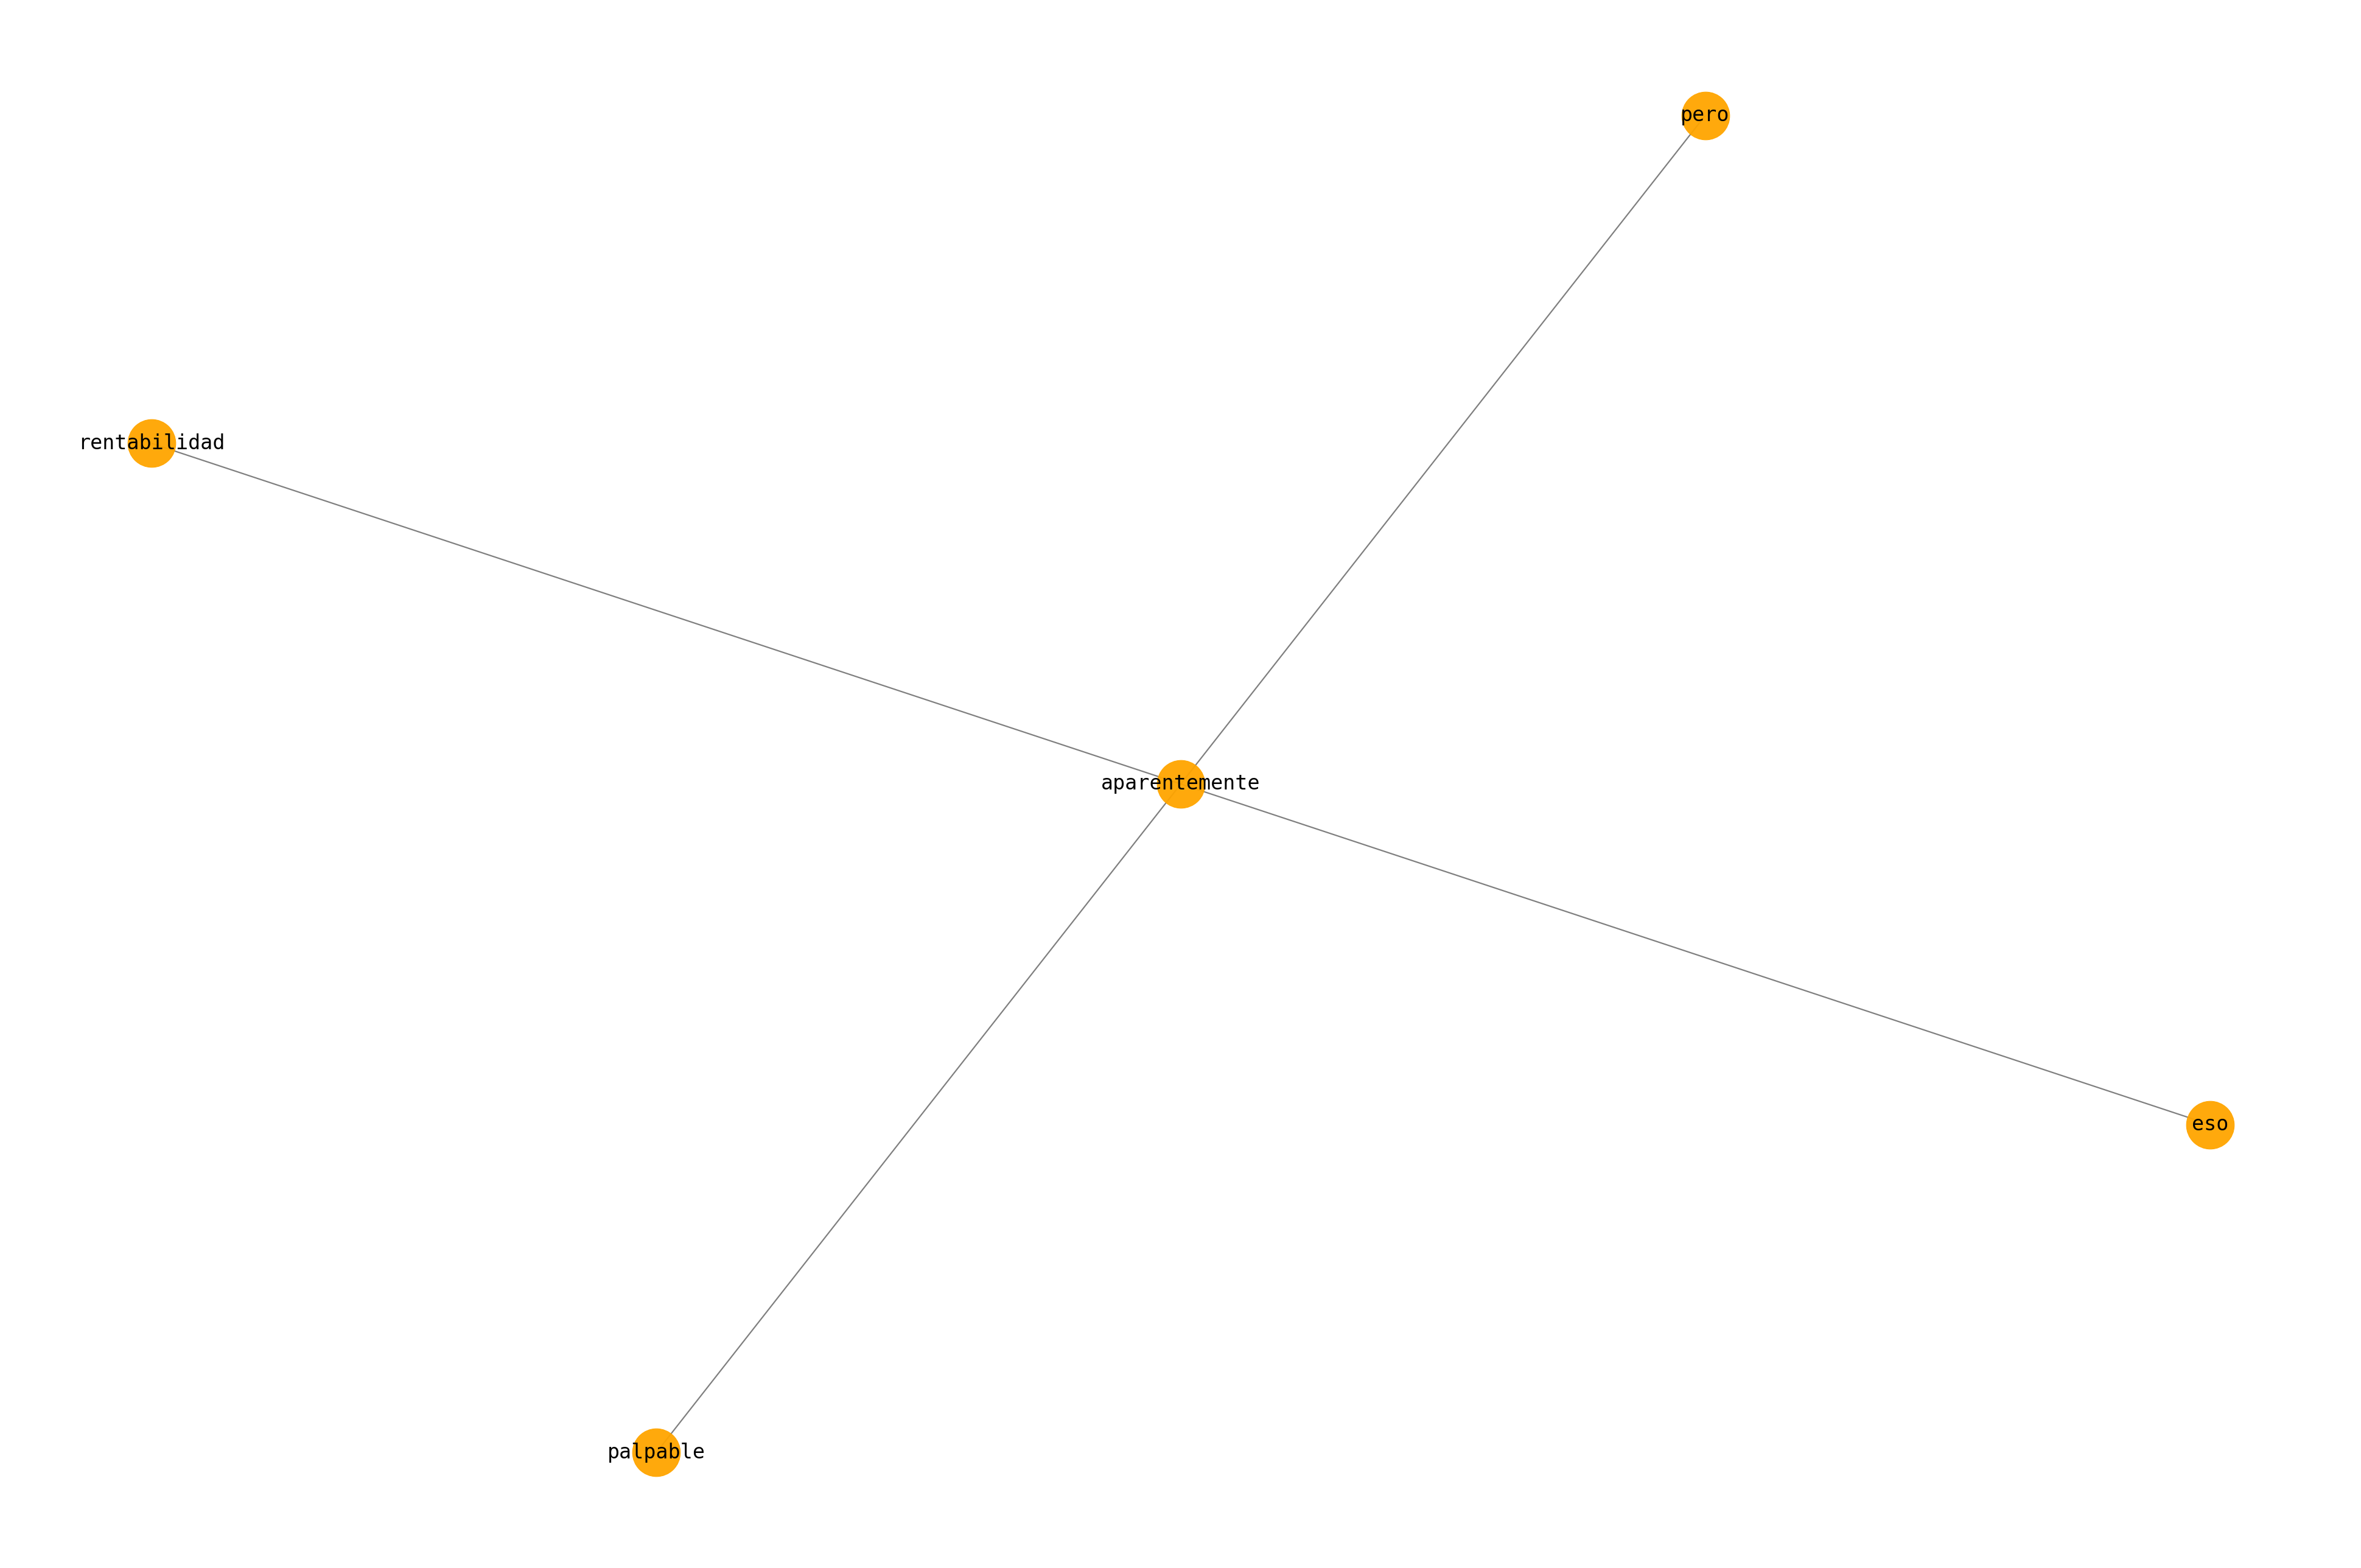

In [100]:
plotG_centrality(G)

In [101]:
def ranking(palabra,k):
    red = G
    return list({k: v for k, v in sorted(dict(red[palabra]).items(), key=lambda item: item[1]['weight'],reverse=True)}.keys())[:k]

In [102]:
for p in L2:
    if p in G.nodes():
        print(p,ranking(p,5))

aparentemente ['pero', 'eso', 'rentabilidad', 'palpable']


#### Orientados al hablante

In [109]:
## Red de co-ocurrencias entre palabras :)
import networkx as nx

def GoW(listapalabras,L3_words):
    
    G=nx.Graph()
    for sentence in listapalabras:
        if len(sentence)>1:
            for word in L3_words:
                word_index = []
                for i in range(len(sentence)):
                    if word == sentence[i]:
                        word_index+=[i]
                pairs = []
                for index in word_index:
                    if index-1 in range(len(sentence)):
                        if sentence[index-1]!='':
                            pairs+=[[index,index-1]]
                    if index+1 in range(len(sentence)):
                        if sentence[index+1]!='':
                            pairs+=[[index,index+1]]
            
                for pair in pairs:
                    if G.has_edge(sentence[pair[0]],sentence[pair[1]])==False:
                        G.add_edge(sentence[pair[0]],sentence[pair[1]],weight=1)
                    else:
                        x=G[sentence[pair[0]]][sentence[pair[1]]]['weight']
                        G[sentence[pair[0]]][sentence[pair[1]]]['weight']=x+1
                    
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])
    
    return G0.subgraph([node for node in G0.nodes() if node in L3 or sum([G.has_edge(node, l) for l in L3])])

In [110]:
G=GoW(listapalabras,L3)

In [111]:
import matplotlib.pyplot as plt

def plotG_centrality(G):
    
    #G0 = G.copy()
    #G0.remove_edges_from(nx.selfloop_edges(G0))
    #G = nx.k_core(G0)
    G = nx.maximum_spanning_tree(G)
    fig, ax = plt.subplots(dpi=800)
    centrality = nx.pagerank(G,weight='weight')
    ordered_centrality = {k: v for k, v in sorted(centrality.items(), key=lambda item: item[1],reverse=True)}
    labels = {i:i for i in G.nodes() if i in list(zip(*list(ordered_centrality.items())[:50]))[0] or i in L3}
    pos = nx.kamada_kawai_layout(G)
    nx.draw_networkx_nodes(G, pos, node_size = 50, node_color='orange',node_shape='o',alpha=0.95, linewidths=0.1) 
    nx.draw_networkx_edges(G, pos, alpha=0.5,width=0.2,edge_color='k')
    nx.draw_networkx_labels(G,pos,labels,alpha=1,font_size=3.,font_color='k',font_family='monospace')
    #plt.title('Red {}'.format(Y),fontsize=8)
    plt.savefig('hablante.jpg', format='jpg', transparent=True, bbox_inches='tight',dpi=800)
    plt.axis('off')
    plt.show()

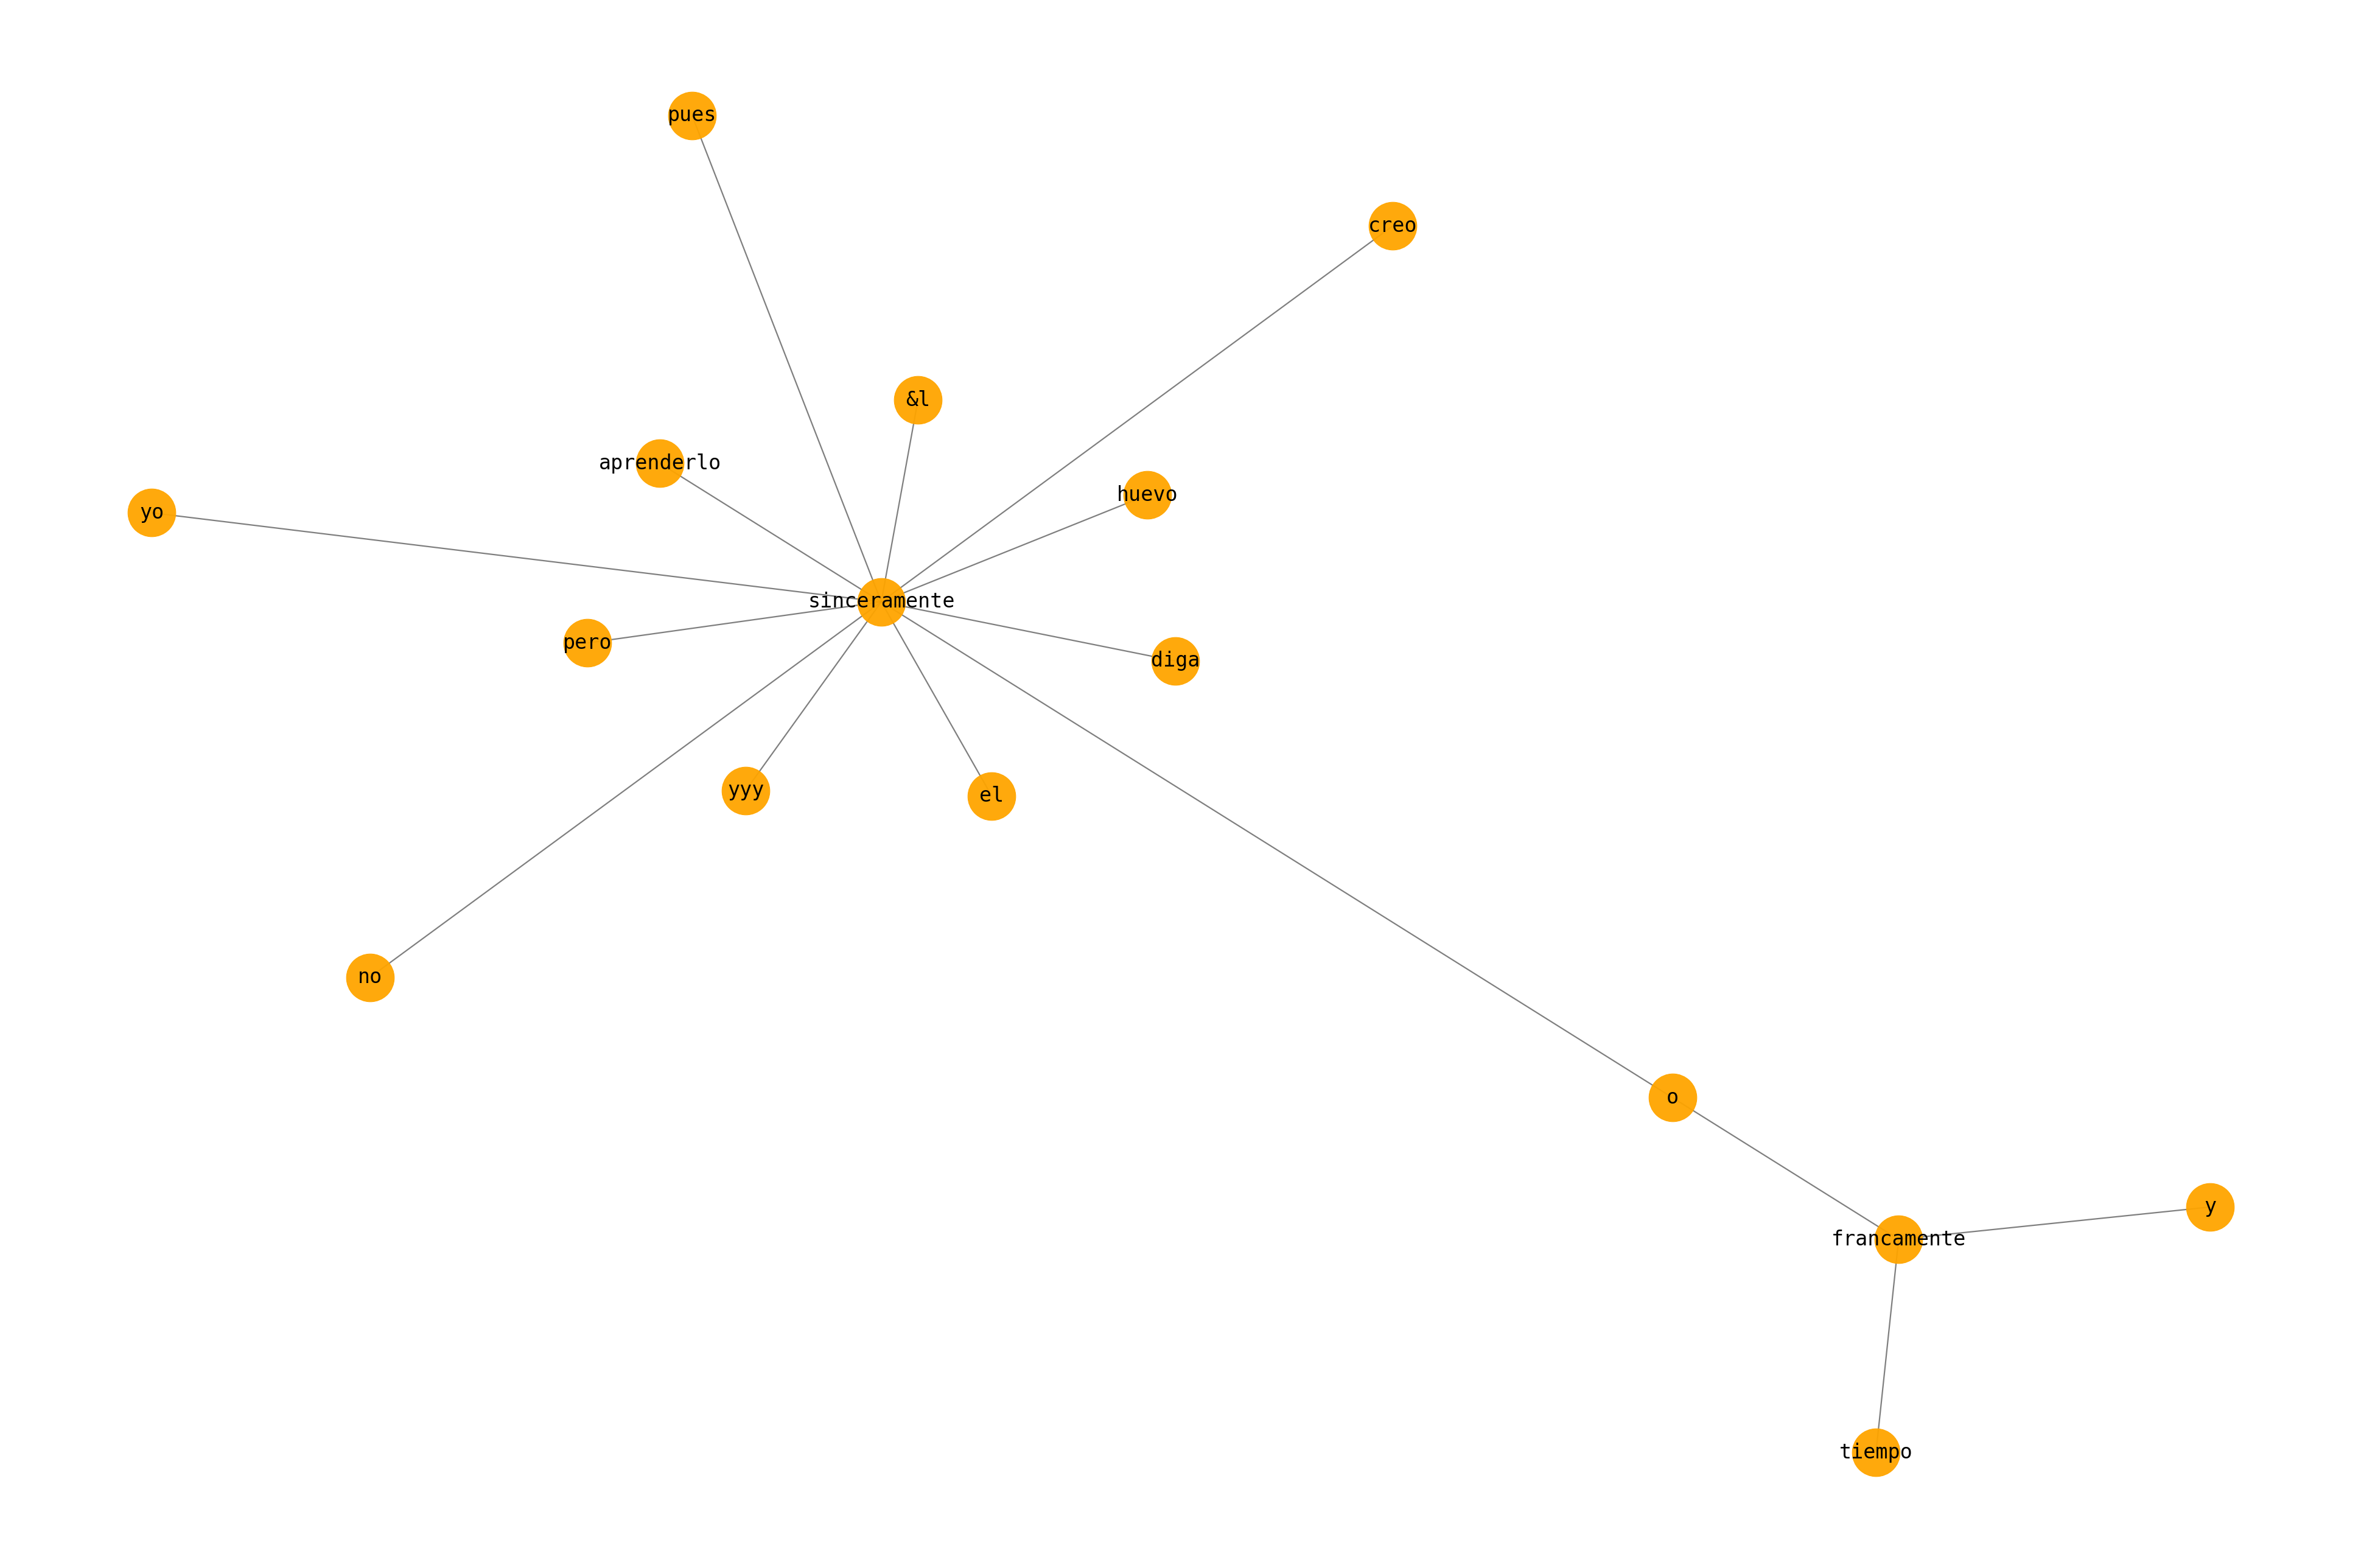

In [112]:
plotG_centrality(G)

In [113]:
def ranking(palabra,k):
    red = G
    return list({k: v for k, v in sorted(dict(red[palabra]).items(), key=lambda item: item[1]['weight'],reverse=True)}.keys())[:k]

In [114]:
for p in L3:
    if p in G.nodes():
        print(p,ranking(p,5))

francamente ['tiempo', 'y', 'o']
sinceramente ['o', 'creo', 'pues', 'yo', 'no']


### obtención de info gramatical del corpus

In [111]:
## aviso que lo ocuparé en este cuaderno 
import spacy

In [112]:
nlp = spacy.load("es_core_news_sm")
infogram=[]

## uso un ciclo for que recorre el texto lematizando
for oracion in cordialimpio:
    doc = nlp(oracion)
    infogram+=[(token.text.lower(),token.pos_) for token in doc]

In [113]:
infogram=[par for par in infogram if par[1] !='SPACE']

In [189]:
infogram[:5]

[('con', 'ADP'),
 ('este', 'DET'),
 ('trabajo', 'NOUN'),
 ('los', 'DET'),
 ('dos', 'NUM')]

In [114]:
tokens=[par[0] for par in infogram]

In [115]:
len(tokens), len(set(tokens))

(117121, 9932)

In [116]:
##Todos los adv del corpus 
adverbios=[]
for par in infogram:
    if par[1]=='ADV':
        adverbios+=[par[0]]

In [117]:
##numero total de adverbios
print(len(adverbios),len(set(adverbios)))

11000 267


In [118]:
adverbios[:100]

['más',
 'seguramente',
 'ya',
 'ahora',
 'mismo',
 'detenidamente',
 'normalmente',
 'no',
 'entonces',
 'bastante',
 'más',
 'realmente',
 'poco',
 'más',
 'siempre',
 'siempre',
 'menos',
 'también',
 'directamente',
 'entonces',
 'ya',
 'no',
 'mucho',
 'bastante',
 'además',
 'bastante',
 'sólo',
 'entonces',
 'primero',
 'no',
 'luego',
 'aquí',
 'sí',
 'bien',
 'mucho',
 'ya',
 'aquí',
 'aquí',
 'no',
 'ahí',
 'entonces',
 'no',
 'ahora',
 'mismo',
 'no',
 'no',
 'entonces',
 'aquí',
 'no',
 'solamente',
 'no',
 'ahora',
 'sólo',
 'solamente',
 'aquí',
 'luego',
 'ahí',
 'ahora',
 'mismo',
 'ahora',
 'bien',
 'no',
 'ahora',
 'también',
 'directamente',
 'ya',
 'más',
 'entonces',
 'siempre',
 'no',
 'entonces',
 'realmente',
 'no',
 'probablemente',
 'menos',
 'muy',
 'bien',
 'no',
 'verdad',
 'entonces',
 'bastante',
 'bastante',
 'menos',
 'poco',
 'no',
 'luego',
 'no',
 'ni',
 'poco',
 'aquí',
 'bastante',
 'primero',
 'también',
 'más',
 'también',
 'también',
 'aquí',
 '

In [119]:
## encontré este código en la página de spacy, me servirá para saber cuántas palabras encuentro por categoría, esto me
## permitirá tener un mejor conteo de la cantidad de palabras totales del texto, y además, calcular proporciones
## entre adverbios y otras clases. 
analisis = []
for s in cordialimpio:
    doc = nlp(s)
    analisis+=[doc]

In [120]:
tokens, pos = [], []

for token in analisis[0]:
    tokens+=[token.text], 
    pos+=[token.pos_]

In [121]:
tokens, pos = [], []

for token in analisis[15]:
    tokens+=[token.text], 
    pos+=[token.pos_]


In [122]:
sustantivos = 0
verbos = 0
adjetivos = 0
det = 0
adv = 0
adp = 0
aux = 0
conj = 0
cconj = 0
interj = 0
conj = 0
num = 0
part = 0
pron = 0
propn = 0
sconj = 0
otros = 0
for doc in analisis:
    pos = []
    for token in doc:
        pos+=[token.pos_] 
    sustantivos+=pos.count('NOUN')
    verbos+=pos.count('VERB')
    adjetivos+=pos.count('ADJ')
    det+=pos.count('DET')
    adv+=pos.count('ADV')
    adp+=pos.count('ADP')
    aux+=pos.count('AUX')
    conj+=pos.count('CONJ')
    cconj+=pos.count('CCONJ')
    interj+=pos.count('INTJ')
    num+=pos.count('NUM')
    part+=pos.count('PART')
    pron+=pos.count('PRON')
    propn+=pos.count('PROPN')
    pron+=pos.count('SCONJ')
    otros+=pos.count('X')
   

In [216]:
## Número de tokens para las palabras
sustantivos+verbos+adjetivos+det+adv+adp+aux+conj+cconj+interj+num+part+pron+propn+sconj+otros

116366

In [217]:
## cantidad de palabras por categoría
print(sustantivos,verbos,adjetivos,det,adv,adp,aux,conj,cconj,interj,num,part,pron,propn,sconj,otros)


18197 13721 6498 13008 11000 13119 8273 0 7440 1477 1223 52 20325 2033 0 0


In [225]:
## cree un diccionario para que los valores me quedaran más ordenados. 
categorías = {'sust':18197,'verb':13721,'adj':6498,'det':13008 ,'adv':11000 ,'adp':13119,'aux':8273 ,'conj':7440,'interj':1477,'num':1223 ,'part':52,'pron':20325,'propn':2033}

In [226]:
categorías

{'sust': 18197,
 'verb': 13721,
 'adj': 6498,
 'det': 13008,
 'adv': 11000,
 'adp': 13119,
 'aux': 8273,
 'conj': 7440,
 'interj': 1477,
 'num': 1223,
 'part': 52,
 'pron': 20325,
 'propn': 2033}

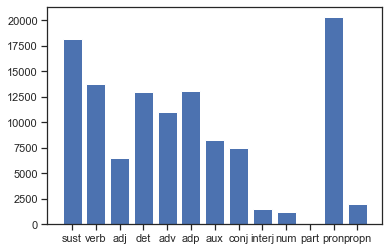

In [227]:
import matplotlib.pyplot as plt


plt.bar(range(len(categorías)), list(categorías.values()), align='center')
plt.xticks(range(len(categorías)), list(categorías.keys()))



plt.show()